In [1]:
!pip install rpy2
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


In [4]:
%%R

#install.packages("svglite")
library(svglite)  # Load it

### August 2021-August 2023 National Health and Nutrition Examination Survey

In [5]:
# reading in participant ID and type of food they consumed
df2123 = pd.read_csv('docs/2021-23/dietary_selected.csv')
df2123.rename(columns={"DR1IFDCD": "food_code"}, inplace=True)

In [6]:
df2123 = df2123[['SEQN', 'food_code']]

In [7]:
df2123['food_code'] = df2123['food_code'].astype(int)

In [8]:
# reading in all the food codes, not just eggs; some codes in this Excel sheet are no longer on USDA's website

codes = pd.read_excel('docs/WWEIA1112_foodcat_FNDDS.xlsx')
codes.head()

,food_code,food_code_description,category_number,category_description,reports_day1,reports_day2
0,11000000,"Milk, human",9602,Human milk,766,607
1,11100000,"Milk, NFS",1004,"Milk, reduced fat",177,68
2,11111000,"Milk, cow's, fluid, whole",1002,"Milk, whole",1762,1618
3,11111100,"Milk, cow's, fluid, whole, low-sodium",1002,"Milk, whole",0,0
4,11111150,"Milk, calcium fortified, cow's, fluid, whole",1002,"Milk, whole",0,0


In [9]:
# filter for eggs from USDA's Excel sheet

egg = codes[codes['category_description'] == 'Eggs and omelets']
egg.shape

(180, 6)

In [10]:
egg = egg[['food_code']]  # keep only one column

**These are all the food codes of egg-related items I copied by hand from the [USDA WWEIA Food Category](https://fdc.nal.usda.gov/food-search?type=Survey%20(FNDDS)&WWEIAFoodCategory=Eggs%20and%20omelets), which is more up to date. I'm using this list to cross-reference to the food code Excel sheet (WWEIA1112_foodcat_FNDDS.xlsx) I downloaded from USDA to ensure that all past and present egg-related food codes are accounted for.**

In [11]:
egg_code = [14630200, 31201000, 32105190, 32130080, 32130040, 32130020, 32130060, 32130000, 32130010, 32130070, 32129990, 32130065, 32130630, 32130640, 32130650, 32130340, 32130320, 32130360, 32130300, 32130310, 32130370, 32130290, 32130365, 32130600, 32130610, 32130620, 32130690, 32130700, 32130710, 32130140, 32130120, 32130160, 32130100, 32130110, 32131030, 32131040, 32131050, 32131000, 32131010, 32131020, 32131090, 32131100, 32131110, 32131060, 32131070, 32131080, 32130170, 32130660, 32130670, 32130680, 32130430, 32130440, 32130450, 32130830, 32130840, 32130850, 32130800, 32130810, 32130820, 32130890, 32130900, 32130910, 32130240, 32130220, 32130260, 32130200, 32130210, 32130270, 32130190, 32130265, 32130860, 32130870, 32130880, 32131200, 32131210, 32131220, 32130460, 32130470, 32130480, 32130400, 32130410, 32130420, 32130490, 32130500, 32130510, 32103050, 32103030, 32103040, 32103035, 32103045, 32103015, 32103025, 32103000, 32103020, 32400070, 32400075, 32400060, 32400065, 32400080, 32400055, 32400078, 32400100, 32400400, 32400500, 32400700, 32400200, 32400600, 32400300, 32101500, 32101000, 32102000, 31108010, 31108120, 31108110, 31108100, 31106020, 31106010, 31106000, 31103010, 31102000, 31105010, 31105060, 31105040, 31105080, 31105020, 31105030, 31105090, 31105005, 31105085, 31107000, 31101010, 31111020, 31111010, 31111000, 31110010, 32105180]

In [12]:
# turning the list into a set for easier visualization
egg_code_set = set(egg_code)

In [13]:
unmatched = egg_code_set - set(egg['food_code'])
unmatched

{31105005,
 31105085,
 31108100,
 31108110,
 31108120,
 32129990,
 32130065,
 32130190,
 32130265,
 32130290,
 32130365,
 32400055,
 32400078}

In [14]:
new_rows = pd.DataFrame({"food_code": list(unmatched)})

In [15]:
egg = pd.concat([egg, new_rows], ignore_index=True)
egg.shape

(193, 1)

**There were discrepancies between `egg_code`(my copy) and `codes`(USDA's Excel), so I updated my local `egg` Excel sheet and re-read it. The problem seems to be that USDA's Excel includes a more expansive list of food codes but is missing the most recent additions, which are in my copy straight from USDA's website.**

In [16]:
# saving the result to a new Excel

# egg.to_excel('docs/appended_egg_codes.xlsx', index=False)

In [17]:
# egg = pd.read_excel('docs/2021-23/egg.xlsx')

In [18]:
# inner join with original table that has all types of food a participant consumed

df2123 = pd.merge(df2123, egg, on='food_code', how='inner')
df2123.head(20)

,SEQN,food_code
0,130389,32131090
1,130394,31105030
2,130397,31105090
3,130413,32130400
4,130432,31105030
5,130437,32131100
6,130438,31105040
7,130444,31103010
8,130453,31105060
9,130471,33001010


In [19]:
df2123.shape

(1511, 2)

**[CDC demographics data 2021-2023](https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Demographics&Cycle=2021-2023)**

In [20]:
# demographics data

demo2123 = pd.read_sas('docs/2021-23/DEMO_L.xpt', format='xport')
demo2123.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHRGND,DMDHRAGZ,DMDHREDZ,DMDHRMAZ,DMDHSEDZ,WTINT2YR,WTMEC2YR,SDMVSTRA,SDMVPSU,INDFMPIR
0,130378.0,12.0,2.0,1.0,43.0,NaN,5.0,6.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,50055.450807,54374.463898,173.0,2.0,5.00
1,130379.0,12.0,2.0,1.0,66.0,NaN,3.0,3.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,29087.450605,34084.721548,173.0,2.0,5.00
2,130380.0,12.0,2.0,2.0,44.0,NaN,2.0,2.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,80062.674301,81196.277992,174.0,1.0,1.41
3,130381.0,12.0,2.0,2.0,5.0,NaN,5.0,7.0,1.0,71.0,...,2.0,2.0,2.0,3.0,NaN,38807.268902,55698.607106,182.0,2.0,1.53
4,130382.0,12.0,2.0,1.0,2.0,NaN,3.0,3.0,2.0,34.0,...,2.0,2.0,3.0,1.0,2.0,30607.519774,36434.146346,182.0,2.0,3.60


In [21]:
# cleaning up

demo2123['SEQN'] = demo2123['SEQN'].astype(int)
demo2123.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHRGND,DMDHRAGZ,DMDHREDZ,DMDHRMAZ,DMDHSEDZ,WTINT2YR,WTMEC2YR,SDMVSTRA,SDMVPSU,INDFMPIR
0,130378,12.0,2.0,1.0,43.0,NaN,5.0,6.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,50055.450807,54374.463898,173.0,2.0,5.00
1,130379,12.0,2.0,1.0,66.0,NaN,3.0,3.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,29087.450605,34084.721548,173.0,2.0,5.00
2,130380,12.0,2.0,2.0,44.0,NaN,2.0,2.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,80062.674301,81196.277992,174.0,1.0,1.41
3,130381,12.0,2.0,2.0,5.0,NaN,5.0,7.0,1.0,71.0,...,2.0,2.0,2.0,3.0,NaN,38807.268902,55698.607106,182.0,2.0,1.53
4,130382,12.0,2.0,1.0,2.0,NaN,3.0,3.0,2.0,34.0,...,2.0,2.0,3.0,1.0,2.0,30607.519774,36434.146346,182.0,2.0,3.60


In [22]:
# renaming the column that has the ratio of family income to poverty

demo2123.rename(columns={"INDFMPIR": "income_poverty"}, inplace=True)
demo2123.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SEQN            11933 non-null  int64  
 1   SDDSRVYR        11933 non-null  float64
 2   RIDSTATR        11933 non-null  float64
 3   RIAGENDR        11933 non-null  float64
 4   RIDAGEYR        11933 non-null  float64
 5   RIDAGEMN        377 non-null    float64
 6   RIDRETH1        11933 non-null  float64
 7   RIDRETH3        11933 non-null  float64
 8   RIDEXMON        8860 non-null   float64
 9   RIDEXAGM        2787 non-null   float64
 10  DMQMILIZ        8301 non-null   float64
 11  DMDBORN4        11914 non-null  float64
 12  DMDYRUSR        1875 non-null   float64
 13  DMDEDUC2        7794 non-null   float64
 14  DMDMARTZ        7792 non-null   float64
 15  RIDEXPRG        1503 non-null   float64
 16  DMDHHSIZ        11933 non-null  float64
 17  DMDHRGND        4115 non-null  

In [23]:
demo2123_select = demo2123[['SEQN', 'income_poverty']]

In [24]:
df2123 = pd.merge(df2123, demo2123_select, on='SEQN', how='inner')  # joining egg consumption data with demographics
df2123.head()

,SEQN,food_code,income_poverty
0,130389,32131090,5.00
1,130394,31105030,5.00
2,130397,31105090,4.48
3,130413,32130400,0.05
4,130432,31105030,1.14


In [25]:
df2123.shape

(1511, 3)

In [26]:
df2123["SEQN"].nunique()  # count distinct

1425

**81 out 1425 participants reported more than one instance of egg consumption within the past 24 hours. That's around 6%.**

In [29]:
pd.set_option("display.max_rows", 100)  # adjusting maximum output
print(df2123['SEQN'].value_counts().head(81))

SEQN
132418    3
132555    3
142025    3
139587    3
141152    3
130547    2
141721    2
141579    2
130500    2
141434    2
141234    2
141230    2
141884    2
140928    2
140582    2
140175    2
140104    2
140045    2
142008    2
139209    2
139139    2
139016    2
138921    2
142176    2
138902    2
138826    2
138507    2
138395    2
138367    2
138338    2
138140    2
138028    2
137924    2
137503    2
137108    2
136380    2
136239    2
136152    2
136051    2
136036    2
135987    2
135952    2
135540    2
135539    2
135470    2
135089    2
134894    2
142288    2
130617    2
130811    2
134886    2
134635    2
134429    2
134165    2
133919    2
133698    2
133607    2
133583    2
130900    2
133473    2
133325    2
133277    2
133215    2
132893    2
142075    2
133350    2
132368    2
132272    2
132201    2
132099    2
132038    2
131997    2
131912    2
131564    2
131556    2
131446    2
131389    2
131373    2
131353    2
131340    2
131258    2
Name: count, dtype: int

**345 out of 1425 participants fall into the richest tier, around 23%. Ratio 5 means their family income is five times or more than the poverty threshhold.**

In [30]:
df2123[df2123['income_poverty']>= 4.75]["SEQN"].nunique()

345

In [32]:
# df2123.to_excel('docs/2021-23/egg_consumption_demo.xlsx')  # saving to local

In [17]:
df2123 = pd.read_excel('docs/2021-23/egg_consumption_demo.xlsx')

#### Plotting with R

In [9]:
%%R

library(readxl)

In [10]:
%%R

df2123 <- read_excel('docs/2021-23/egg_consumption_demo.xlsx')
df2123

New names:
• `` -> `...1`
# A tibble: 1,511 × 4
    ...1   SEQN food_code income_poverty
   <dbl>  <dbl>     <dbl>          <dbl>
 1     0 130389  32131090           5   
 2     1 130394  31105030           5   
 3     2 130397  31105090           4.48
 4     3 130413  32130400           0.05
 5     4 130432  31105030           1.14
 6     5 130437  32131100           1.09
 7     6 130438  31105040           5   
 8     7 130444  31103010           4.36
 9     8 130453  31105060           3.82
10     9 130471  33001010           2.92
# ℹ 1,501 more rows
# ℹ Use `print(n = ...)` to see more rows


**There are 173 rows out of 1511 missing `income_poverty`, around 11%**

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 173 rows containing non-finite outside the scale range (`stat_bin()`). 



In addition: Warning message:
Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was
generated. 


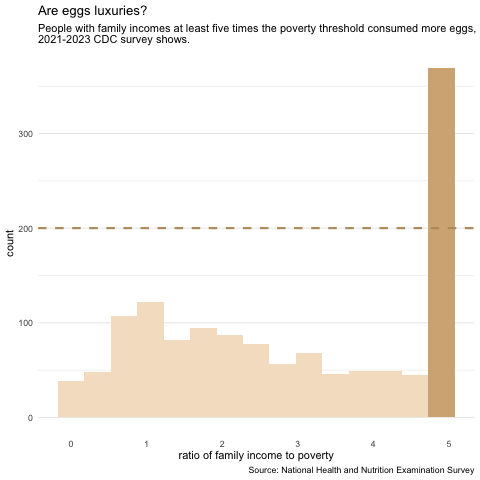

In [37]:
%%R

plot2123 = ggplot(df2123) +
    aes(x=income_poverty) +
    geom_histogram(binwidth=0.35, aes(fill = ifelse(income_poverty >= 4.75, "Highlight", "Fade"))) +
    scale_fill_manual(values = c("Highlight" = "#D5B185", "Fade" = "#F4E1C9")) +
    geom_hline(yintercept = 200, color = "#B9996A", linetype = "dashed", size = 1) +
    theme_minimal() +
    theme(
        panel.grid.major.x = element_blank(),
        panel.grid.minor.x = element_blank(),
        #panel.grid.minor.y = element_blank()
        legend.position = 'None'
    ) +
    labs(
        x = "ratio of family income to poverty",
        title = "Are eggs luxuries?", 
        subtitle = "People with family incomes at least five times the poverty threshold consumed more eggs, 
2021-2023 CDC survey shows.", 
        caption = "Source: National Health and Nutrition Examination Survey"
    )

plot2123

In [38]:
%%R

ggsave("docs/2021-23/my_plot.svg", plot = plot2123, width = 8, height = 6, dpi = 300)

In addition: Warning message:
Removed 173 rows containing non-finite outside the scale range (`stat_bin()`). 


### 2017-2018 National Health and Nutrition Examination Survey

In [39]:
df1718 = pd.read_sas('docs/2017-18/DR1IFF_J.xpt', format='xport')  # dietary survey

In [40]:
df1718.rename(columns={"DR1IFDCD": "food_code"}, inplace=True)

In [41]:
df1718['SEQN'] = df1718['SEQN'].astype(int)  # cleaning up

In [42]:
df1718 = df1718[['SEQN', 'food_code']]

In [43]:
df1718 = pd.merge(df1718, egg, on='food_code', how='inner')  # filter for eggs

In [44]:
demo1718 = pd.read_sas('docs/2017-18/DEMO_J.xpt', format='xport')  # demographics

In [45]:
demo1718.rename(columns={"INDFMPIR": "income_poverty"}, inplace=True)

In [46]:
demo1718_select = demo1718[['SEQN', 'income_poverty']]

In [47]:
df1718 = pd.merge(df1718, demo1718_select, on='SEQN', how='inner')  # joining egg consumption data with demographics

In [48]:
df1718["SEQN"].nunique()  # count distinct

1650

**303 out of 1650 egg-eating participants are in the richest tier, around 18%**

In [49]:
df1718[df1718['income_poverty']>= 4.7]["SEQN"].nunique()

303

**131 out of 1650 participants reported more than one instance of egg consumption, around 8%**

In [55]:
pd.set_option("display.max_rows", 160)  # adjusting maximum output
print(df1718['SEQN'].value_counts().head(132))

SEQN
97738     4
95839     3
98416     3
102625    2
102620    2
102595    2
102492    2
102395    2
93741     2
102361    2
102311    2
102258    2
102145    2
102044    2
102041    2
102029    2
102000    2
101836    2
101789    2
101756    2
101726    2
101687    2
101636    2
101553    2
102819    2
101478    2
101378    2
101311    2
101241    2
101179    2
101003    2
100986    2
100876    2
100746    2
100725    2
100704    2
100619    2
100525    2
100448    2
100412    2
100368    2
100318    2
100305    2
102895    2
100055    2
99924     2
99830     2
99825     2
99790     2
99679     2
99548     2
99444     2
99248     2
99219     2
99157     2
99120     2
99088     2
99060     2
99008     2
93964     2
93965     2
98916     2
98845     2
98832     2
98743     2
98714     2
98597     2
98588     2
98491     2
102628    2
98413     2
98407     2
98091     2
98062     2
97866     2
97830     2
97813     2
97809     2
94041     2
102682    2
97610     2
97595     2
97573     2

In [56]:
#df1718.to_excel('docs/2017-18/egg_consumption_demo.xlsx')  # saving to local file

In [18]:
df1718 = pd.read_excel('docs/2017-18/egg_consumption_demo.xlsx')

#### Plotting with R

In [57]:
%%R

df1718 <- read_excel('docs/2017-18/egg_consumption_demo.xlsx')
df1718

New names:
• `` -> `...1`
# A tibble: 1,785 × 4
    ...1  SEQN food_code income_poverty
   <dbl> <dbl>     <dbl>          <dbl>
 1     0 93707  32130070           1.88
 2     1 93710  32130060           4.9 
 3     2 93711  31103010           5   
 4     3 93714  32130020           1.86
 5     4 93715  31105060           1.56
 6     5 93721  31105090           3.04
 7     6 93723  31103010           3.69
 8     7 93726  32130650           1.85
 9     8 93727  32130500           5   
10     9 93729  31103010           0.83
# ℹ 1,775 more rows
# ℹ Use `print(n = ...)` to see more rows


R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 210 rows containing non-finite outside the scale range (`stat_bin()`). 



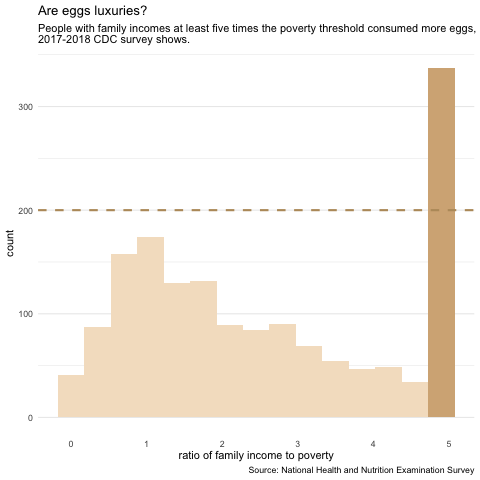

In [58]:
%%R

plot1718 = ggplot(df1718) +
    aes(x=income_poverty) +
    geom_histogram(binwidth=0.35, aes(fill = ifelse(income_poverty >= 4.7, "Highlight", "Fade"))) +
    scale_fill_manual(values = c("Highlight" = "#D5B185", "Fade" = "#F4E1C9")) +
    geom_hline(yintercept = 200, color = "#B9996A", linetype = "dashed", size = 1) +
    theme_minimal() +
    theme(
        panel.grid.major.x = element_blank(),
        panel.grid.minor.x = element_blank(),
        #panel.grid.minor.y = element_blank()
        legend.position = 'None'
    ) +
    labs(
        x = "ratio of family income to poverty",
        title = "Are eggs luxuries?", 
        subtitle = "People with family incomes at least five times the poverty threshold consumed more eggs, 
2017-2018 CDC survey shows.", 
        caption = "Source: National Health and Nutrition Examination Survey"
    )

plot1718

In [59]:
%%R

ggsave("docs/2017-18/my_plot.svg", plot = plot1718, width = 8, height = 6, dpi = 300)

In addition: Warning message:
Removed 210 rows containing non-finite outside the scale range (`stat_bin()`). 


### 2015-2016 National Health and Nutrition Examination Survey

In [60]:
df1516 = pd.read_sas('docs/2015-16/DR1IFF_I.xpt', format='xport')  # dietary survey

In [61]:
df1516.rename(columns={"DR1IFDCD": "food_code"}, inplace=True)

In [62]:
df1516['SEQN'] = df1516['SEQN'].astype(int)  # cleaning up

In [63]:
df1516 = df1516[['SEQN', 'food_code']]

In [66]:
df1516['food_code'] = df1516['food_code'].astype(int)

In [69]:
df1516 = pd.merge(df1516, egg, on='food_code', how='inner')  # filter for eggs

In [77]:
demo1516 = pd.read_sas('docs/2015-16/DEMO_I.xpt', format='xport')  # demographics

In [78]:
demo1516.rename(columns={"INDFMPIR": "income_poverty"}, inplace=True)

In [79]:
demo1516_select = demo1516[['SEQN', 'income_poverty']]

In [80]:
df1516 = pd.merge(df1516, demo1516_select, on='SEQN', how='inner')  # joining egg consumption data with demographics

In [81]:
df1516["SEQN"].nunique()  # count distinct

1800

**272 out of 1800 egg-eating participants fell into the richest tier, around 15%**

In [83]:
df1516[df1516['income_poverty']>= 4.75]["SEQN"].nunique()

272

**109 out of 1800 egg-eating participants reported more than one instance of egg consumption, around 6%**

In [87]:
pd.set_option("display.max_rows", 200)  # adjusting maximum output
print(df1516['SEQN'].value_counts().head(109))

SEQN
90845    4
84763    3
85158    3
85382    3
88966    3
89307    3
93328    3
91915    3
91946    3
92175    3
92735    3
92907    2
92866    2
93565    2
93176    2
92720    2
92622    2
92618    2
92588    2
92247    2
93185    2
92123    2
93550    2
91922    2
91918    2
93224    2
91879    2
93624    2
91779    2
91761    2
91492    2
91484    2
93633    2
91356    2
91347    2
91288    2
91247    2
91110    2
91096    2
90856    2
83777    2
90797    2
90793    2
90654    2
90610    2
90495    2
90487    2
90249    2
90219    2
83942    2
90186    2
90096    2
90086    2
90045    2
83979    2
89980    2
89893    2
89701    2
89380    2
83804    2
89053    2
89014    2
88988    2
84015    2
83869    2
88772    2
88632    2
88502    2
88316    2
88114    2
88041    2
84063    2
88016    2
87810    2
87808    2
87782    2
87777    2
87446    2
87292    2
87244    2
86552    2
86438    2
86376    2
86347    2
86241    2
86041    2
85952    2
85828    2
85760    2
85724    2
85503

In [88]:
#df1516.to_excel('docs/2015-16/egg_consumption_demo.xlsx')  # saving to local file

In [19]:
df1516 = pd.read_excel('docs/2015-16/egg_consumption_demo.xlsx')

In [144]:
print((pd.cut(df1516['income_poverty'], 
                          bins=[0, 1, 2, 3, 4, 5],
                          labels=['0-1', '1-2', '2-3', '3-4', '4+'],
                          include_lowest=True)).value_counts())

income_poverty
1-2    468
0-1    437
4+     378
2-3    316
3-4    147
Name: count, dtype: int64


#### Plotting with R

In [89]:
%%R

df1516 <- read_excel('docs/2015-16/egg_consumption_demo.xlsx')
df1516

New names:
• `` -> `...1`
# A tibble: 1,921 × 4
    ...1  SEQN food_code income_poverty
   <dbl> <dbl>     <dbl>          <dbl>
 1     0 83734  31103010       1.51e+ 0
 2     1 83739  32130020       4.22e+ 0
 3     2 83742  31105030       1.03e+ 0
 4     3 83744  32131100       1.19e+ 0
 5     4 83745  31105030       8.6 e- 1
 6     5 83752  32129990       5   e+ 0
 7     6 83756  32130910       1.11e+ 0
 8     7 83759  31105030       1.74e+ 0
 9     8 83761  31102000       5.40e-79
10     9 83766  32130160       3.34e+ 0
# ℹ 1,911 more rows
# ℹ Use `print(n = ...)` to see more rows


R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 175 rows containing non-finite outside the scale range (`stat_bin()`). 



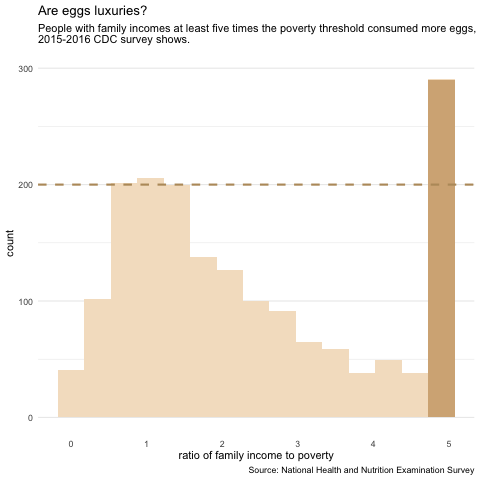

In [90]:
%%R

plot1516 = ggplot(df1516) +
    aes(x=income_poverty) +
    geom_histogram(binwidth=0.35, aes(fill = ifelse(income_poverty >= 4.75, "Highlight", "Fade"))) +
    ylim(0, 300) +
    scale_fill_manual(values = c("Highlight" = "#D5B185", "Fade" = "#F4E1C9")) +
    geom_hline(yintercept = 200, color = "#B9996A", linetype = "dashed", size = 1) +
    theme_minimal() +
    theme(
        panel.grid.major.x = element_blank(),
        panel.grid.minor.x = element_blank(),
        #panel.grid.minor.y = element_blank()
        legend.position = 'None'
    ) +
    labs(
        x = "ratio of family income to poverty",
        title = "Are eggs luxuries?", 
        subtitle = "People with family incomes at least five times the poverty threshold consumed more eggs, 
2015-2016 CDC survey shows.", 
        caption = "Source: National Health and Nutrition Examination Survey"
    )

plot1516

In [91]:
%%R

ggsave("docs/2015-16/my_plot.svg", plot = plot1516, width = 8, height = 6, dpi = 300)

In addition: Warning message:
Removed 175 rows containing non-finite outside the scale range (`stat_bin()`). 


### 2013-2014 National Health and Nutrition Examination Survey

In [92]:
df1314 = pd.read_sas('docs/2013-14/DR1IFF_H.xpt', format='xport')  # dietary survey

In [93]:
df1314.rename(columns={"DR1IFDCD": "food_code"}, inplace=True)

In [94]:
df1314['SEQN'] = df1314['SEQN'].astype(int)  # cleaning up

In [95]:
df1314 = df1314[['SEQN', 'food_code']]

In [96]:
df1314 = pd.merge(df1314, egg, on='food_code', how='inner')  # filter for eggs

In [97]:
demo1314 = pd.read_sas('docs/2013-14/DEMO_H.xpt', format='xport')  # demographics

In [98]:
demo1314.rename(columns={"INDFMPIR": "income_poverty"}, inplace=True)

In [99]:
demo1314_select = demo1314[['SEQN', 'income_poverty']]

In [100]:
df1314 = pd.merge(df1314, demo1314_select, on='SEQN', how='inner')  # joining egg consumption data with demographics

In [101]:
df1314["SEQN"].nunique()  # count distinct

1790

**290 out of 1790 egg-eating participants fell into the richest tier, around 15%**

In [102]:
df1314[df1314['income_poverty']>= 4.75]["SEQN"].nunique()

290

**126 out of 1790 reported more than one instance of egg consumption, around 7%**

In [104]:
pd.set_option("display.max_rows", 130)  # adjusting maximum output
print(df1314['SEQN'].value_counts().head(127))

SEQN
81291    4
74470    3
76600    3
77422    3
78356    3
78371    3
79388    3
79390    3
73722    2
83351    2
83299    2
83250    2
83170    2
83169    2
83101    2
82854    2
82713    2
82610    2
82551    2
82200    2
82190    2
82086    2
82045    2
81958    2
81704    2
81593    2
81512    2
81503    2
81479    2
81356    2
81352    2
81331    2
81304    2
73678    2
81145    2
81080    2
81009    2
80961    2
80900    2
80823    2
80778    2
80623    2
80585    2
80479    2
80413    2
80096    2
80092    2
80050    2
79914    2
79849    2
79809    2
79739    2
79636    2
79603    2
79573    2
79549    2
73674    2
73740    2
83701    2
79211    2
78970    2
78821    2
73878    2
78812    2
78772    2
78767    2
78694    2
78655    2
78638    2
78594    2
78479    2
73660    2
83429    2
78303    2
78240    2
78195    2
78054    2
77951    2
77943    2
77930    2
77835    2
77668    2
77570    2
77556    2
77554    2
77514    2
83478    2
77365    2
77265    2
77262    2
77130

In [105]:
#df1314.to_excel('docs/2013-14/egg_consumption_demo.xlsx')  # saving to local file

In [20]:
df1314 = pd.read_excel('docs/2013-14/egg_consumption_demo.xlsx')

#### Plotting with R

In [106]:
%%R

df1314 <- read_excel('docs/2013-14/egg_consumption_demo.xlsx')
df1314

New names:
• `` -> `...1`
# A tibble: 1,925 × 4
    ...1  SEQN food_code income_poverty
   <dbl> <dbl>     <dbl>          <dbl>
 1     0 73562  32103000           4.79
 2     1 73568  32130690           5   
 3     2 73592  31103010           2.14
 4     3 73593  32130170           4.19
 5     4 73594  31103010           0.45
 6     5 73600  31105030           0.63
 7     6 73605  31105010           4.25
 8     7 73609  31105080           1.09
 9     8 73610  32130170           2.03
10     9 73613  32130490           5   
# ℹ 1,915 more rows
# ℹ Use `print(n = ...)` to see more rows


R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 122 rows containing non-finite outside the scale range (`stat_bin()`). 



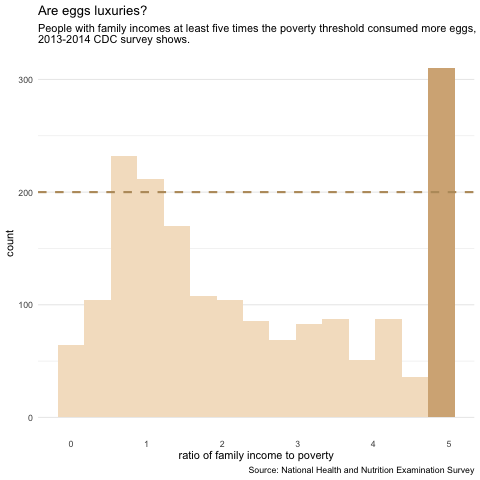

In [107]:
%%R

plot1314 = 
    ggplot(df1314) +
    aes(x=income_poverty) +
    geom_histogram(binwidth=0.35, aes(fill = ifelse(income_poverty >= 4.75, "Highlight", "Fade"))) +
    scale_fill_manual(values = c("Highlight" = "#D5B185", "Fade" = "#F4E1C9")) +
    geom_hline(yintercept = 200, color = "#B9996A", linetype = "dashed", size = 1) +
    theme_minimal() +
    theme(
        panel.grid.major.x = element_blank(),
        panel.grid.minor.x = element_blank(),
        #panel.grid.minor.y = element_blank()
        legend.position = 'None'
    ) +
    labs(
        x = "ratio of family income to poverty",
        title = "Are eggs luxuries?", 
        subtitle = "People with family incomes at least five times the poverty threshold consumed more eggs, 
2013-2014 CDC survey shows.", 
        caption = "Source: National Health and Nutrition Examination Survey"
    )

plot1314

In [108]:
%%R

ggsave("docs/2013-14/my_plot.svg", plot = plot1314, width = 8, height = 6, dpi = 300)

In addition: Warning message:
Removed 122 rows containing non-finite outside the scale range (`stat_bin()`). 


### Combining all years into one chart

In [21]:
df1314['year'] = '2013-2014'

In [23]:
df1516['year'] = '2015-2016'

In [24]:
df1718['year'] = '2017-2018'

In [25]:
df2123['year'] = '2021-2023'

In [26]:
df_all = pd.concat([df1314, df1516, df1718, df2123], ignore_index=True)

In [29]:
df_all.to_excel('docs/all_years_data.xlsx', index=False)

In [30]:
df_all = pd.read_excel('docs/all_years_data.xlsx')

In [31]:
df_all

,Unnamed: 0,SEQN,food_code,income_poverty,year
0,0,73562,32103000,4.79,2013-2014
1,1,73568,32130690,5.00,2013-2014
2,2,73592,31103010,2.14,2013-2014
3,3,73593,32130170,4.19,2013-2014
4,4,73594,31103010,0.45,2013-2014
...,...,...,...,...,...
7137,1506,142277,31105030,0.23,2021-2023
7138,1507,142278,31103010,2.13,2021-2023
7139,1508,142288,31111000,3.42,2021-2023
7140,1509,142288,31108100,3.42,2021-2023


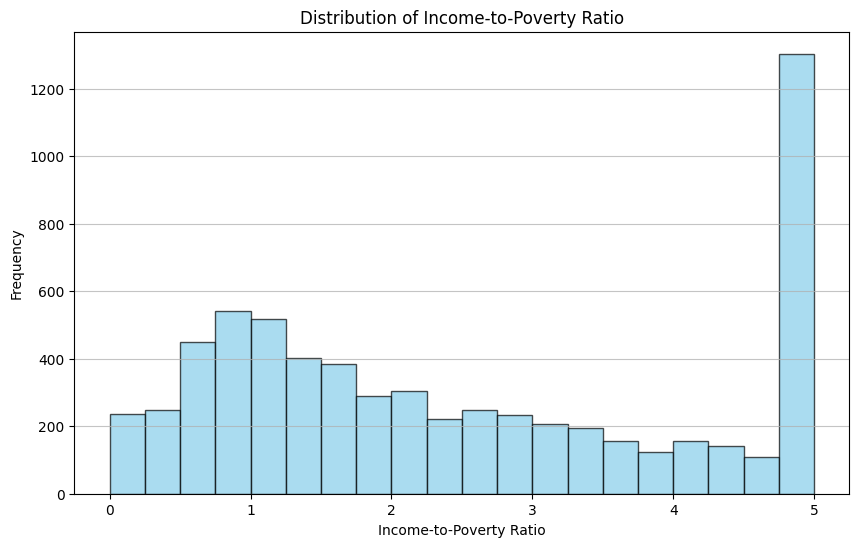

In [33]:
plt.figure(figsize=(10, 6))
plt.hist(df_all['income_poverty'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Income-to-Poverty Ratio')
plt.xlabel('Income-to-Poverty Ratio')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

**⚠️ Methodological choice: grouping different income ratios into five tiers**

In [141]:
# Create income groups using pd.cut()
df_all['income_group'] = pd.cut(df_all['income_poverty'], 
                          bins=[0, 1, 2, 3, 4, 5],
                          labels=['0-1', '1-2', '2-3', '3-4', '4+'],
                          include_lowest=True)

In [142]:
df_all['income_group'].value_counts()

income_group
4+     1698
1-2    1581
0-1    1499
2-3    1007
3-4     677
Name: count, dtype: int64

In [126]:
# Group by year and income_group, count the occurrences
consumption_count = df_all.groupby(['year', 'income_group']).size().reset_index(name='count')

In [132]:
%%R -i consumption_count -o consumption_count_wide

consumption_count_wide <- consumption_count %>%
  pivot_wider(names_from = income_group, values_from = count)

print(consumption_count_wide)

# A tibble: 4 × 6
  year      `0-1` `1-2` `2-3` `3-4` `4-5`
  <chr>     <int> <int> <int> <int> <int>
1 2013-2014   475   436   241   218   433
2 2015-2016   437   468   316   147   378
3 2017-2018   349   401   244   160   421
4 2021-2023   238   276   206   152   466


In [134]:
consumption_count_wide.to_excel('docs/consumption_count.xlsx')

In [11]:
%%R
# assign all_years_data to df in R
df <- read_excel('docs/all_years_data.xlsx')

New names:
• `` -> `...1`


In [27]:
%%R

install.packages("showtext")

library(showtext)


The downloaded binary packages are in
	/var/folders/29/tm85f6r96dl6jl70q7g6h2rr0000gn/T//RtmpqqppSr/downloaded_packages


also installing the dependencies ‘sysfonts’, ‘showtextdb’

trying URL 'https://repo.miserver.it.umich.edu/cran/bin/macosx/big-sur-x86_64/contrib/4.4/sysfonts_0.8.9.tgz'
Content type 'application/octet-stream' length 7205298 bytes (6.9 MB)
downloaded 6.9 MB

trying URL 'https://repo.miserver.it.umich.edu/cran/bin/macosx/big-sur-x86_64/contrib/4.4/showtextdb_3.0.tgz'
Content type 'application/octet-stream' length 2010550 bytes (1.9 MB)
downloaded 1.9 MB

trying URL 'https://repo.miserver.it.umich.edu/cran/bin/macosx/big-sur-x86_64/contrib/4.4/showtext_0.9-7.tgz'
Content type 'application/octet-stream' length 479661 bytes (468 KB)
downloaded 468 KB

Loading required package: sysfonts
Loading required package: showtextdb


In [29]:
%%R

font_add_google("Roboto", "roboto")  # Load Roboto font
showtext_auto()  # Enable showtext for ggplot

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 680 rows containing non-finite outside the scale range (`stat_bin()`). 



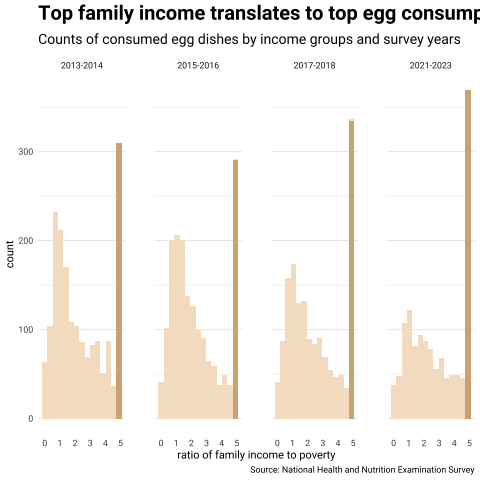

In [42]:
%%R

df_plot = ggplot(df) +
    aes(x=income_poverty) +
    geom_histogram(binwidth=0.35, aes(fill = ifelse(income_poverty >= 4.75, "Highlight", "Fade"))) +
    scale_fill_manual(values = c("Highlight" = "#D5B185", "Fade" = "#F4E1C9")) +
    facet_wrap(~year, ncol=4) +
    theme_minimal() +
    theme(
        panel.grid.major.x = element_blank(),
        panel.grid.minor.x = element_blank(),
        #panel.grid.minor.y = element_blank()
        legend.position = 'None',
        text = element_text(family = "roboto"),  # Set all text to Roboto
        plot.title = element_text(family = "roboto", size = 20, face = "bold", margin = margin(b = 10)),  # Bold for title
        plot.subtitle = element_text(family = "roboto", size = 14, margin = margin(b = 10)),  # Regular for subtitle
        panel.spacing = unit(2, "lines")
    ) +
    labs(
        x = "ratio of family income to poverty",
        title = "Top family income translates to top egg consumption", 
        subtitle = "Counts of consumed egg dishes by income groups and survey years", 
        caption = "Source: National Health and Nutrition Examination Survey"
    )

df_plot

In [40]:
%%R

ggsave("docs/all_years_data.svg", plot = df_plot, width = 8, height = 6, dpi = 300)

In addition: Warning message:
Removed 680 rows containing non-finite outside the scale range (`stat_bin()`). 
